In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the data for the centerline and raceline
centerline_path = './General1_centerline.csv'
raceline_path = './General1_raceline.csv'
map_image_path = './General1_map.png'

In [8]:
# Since there was a KeyError, the CSV files likely do not contain 'x' and 'y' columns.
# Let's load the CSVs again and take a look at the first few rows to understand their structure.

# Load the CSV files again
centerline_df = pd.read_csv(centerline_path)
raceline_df = pd.read_csv(raceline_path)

# Display the first few rows of each dataframe to inspect their structure
centerline_head = centerline_df.head()
raceline_head = raceline_df.head()

# Display the map image
img = mpimg.imread(map_image_path)

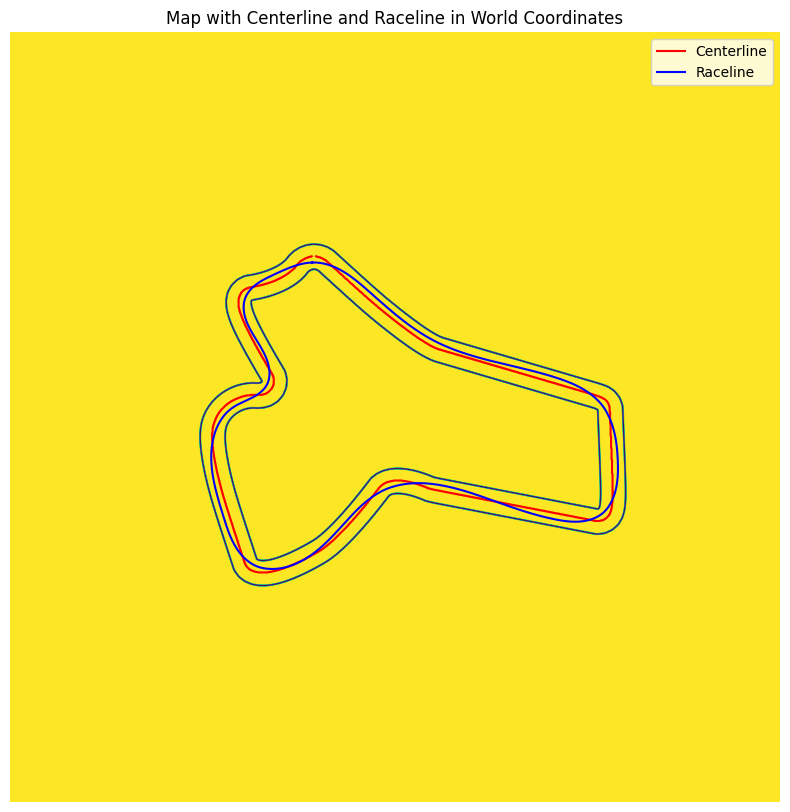

In [13]:
# Let's convert the map image coordinates to the world frame using the provided resolution and origin.

# Origin and resolution from the YAML file
origin_x, origin_y, _ = [-78.21853769831466, -44.37590462453829, 0.0]
resolution = 0.0625  # meters per pixel

# Adjust the coordinates in the dataframes to the world frame
centerline_df['world_x'] = (centerline_df['x'])
centerline_df['world_y'] = (centerline_df['y'])

raceline_df['world_x'] = (raceline_df['x'])
raceline_df['world_y'] = (raceline_df['y'])

# Now let's replot with the adjusted world frame coordinates
plt.figure(figsize=(10, 10))
plt.imshow(img, extent=[origin_x, origin_x + img.shape[1]*resolution,
                        origin_y, origin_y + img.shape[0]*resolution])
plt.plot(centerline_df['world_x'], centerline_df['world_y'], 'r', label='Centerline')  # Red for centerline
plt.plot(raceline_df['world_x'], raceline_df['world_y'], 'b', label='Raceline')  # Blue for raceline
plt.legend()
plt.axis('off')  # Turn off axis
plt.title('Map with Centerline and Raceline in World Coordinates')
plt.show()
